0. 외부함수 사용을 위해 필요한 라이브러리 불러오기

In [1]:
import finterstellar as fs
import pandas as pd

In [2]:
K10_dict = {
    '005930' : '삼성전자',
    '000660' : 'SK하이닉스',
    '051910' : 'LG화학',
    '068270' : '셀트리온',
    '005380' : '현대차',
    '207940' : '삼성바이오로직스',
    '005490' : 'POSCO',
    '028260' : '삼성물산',
    '015760' : '한국전력',
    '035420' : 'NAVER'
}

1. 시가총액이 있는 엑셀 파일 읽기: read_excel()

In [3]:
path = './data/'     # 파일위치
n = 'K10_info.xlsx'     # 파일명

In [4]:
file_name = path + n    # 읽어올 파일위치+파일명 지정
stock_info = pd.read_excel(file_name, converters={'code':str})
'''
    pd.read_excel(파일명) - 엑셀파일을 읽어 데이터프레임으로 변환시켜 돌려주는 함수
    converters={'code':str} - 데이터 형식을 '문자'형식으로 지정, 
    생략 시 pd가 이 컬럼을 자동으로 숫자로 인식해 종목코드 앞쪽 0을 삭제해버리게됨
'''
stock_info.set_index('code', inplace=True)
stock_info.head(10)

,name,outstanding
code,,
005930,삼성전자,5969782550
000660,SK하이닉스,728002365
051910,LG화학,70592343
068270,셀트리온,127953489
005380,현대차,213668187
207940,삼성바이오로직스,66165000
005490,POSCO,87186835
028260,삼성물산,189690043
015760,한국전력,641964077


4. 10개 종목의 시세 데이터 로딩 : create_portfolio_df()

In [5]:
n = 'K10_prices.xlsx'     # 파일명

In [6]:
file_name = path + n    # 읽어올 파일위치+파일명 지정
price = pd.read_excel(file_name)
'''
    pd.read_excel(파일명) - 엑셀파일을 읽어 데이터프레임으로 변환시켜 돌려주는 함수
    converters={'code':str} - 데이터 형식을 '문자'형식으로 지정, 
    생략 시 pd가 이 컬럼을 자동으로 숫자로 인식해 종목코드 앞쪽 0을 삭제해버리게됨
'''
price.set_index('trade_date', inplace=True)
price.tail()

,005930,000660,051910,068270,005380,207940,005490,028260,015760,035420
trade_date,,,,,,,,,,
2019-02-13,46200,76200,378000,212000,124500,379500.0,267000,117500.0,34000,125000
2019-02-14,47500,77400,380000,210000,121500,382000.0,266500,117500.0,33800,127500
2019-02-15,46050,73800,380000,209500,121000,380000.0,265500,116000.0,33500,127500
2019-02-18,46200,74700,391000,212000,120500,379000.0,262500,116500.0,33050,127000
2019-02-19,45950,73700,390000,215000,119500,384500.0,268500,116000.0,33000,126500


In [7]:
ld = fs.LoadData()

In [8]:
price = ld.date_formatting(price)
price.tail()

,005930,000660,051910,068270,005380,207940,005490,028260,015760,035420
Date,,,,,,,,,,
2019-02-13,46200,76200,378000,212000,124500,379500.0,267000,117500.0,34000,125000
2019-02-14,47500,77400,380000,210000,121500,382000.0,266500,117500.0,33800,127500
2019-02-15,46050,73800,380000,209500,121000,380000.0,265500,116000.0,33500,127500
2019-02-18,46200,74700,391000,212000,120500,379000.0,262500,116500.0,33050,127000
2019-02-19,45950,73700,390000,215000,119500,384500.0,268500,116000.0,33000,126500


In [9]:
base_date = '2018-01-02'

In [10]:
price = price[base_date:]
# 1월1일에 들어있는 NaN 제거
price.head()

,005930,000660,051910,068270,005380,207940,005490,028260,015760,035420
Date,,,,,,,,,,
2018-01-02,51020,76600,411000,225900,149500,389500.0,339000,127500.0,37750,177251
2018-01-03,51620,77700,409500,246700,150500,391000.0,357500,126500.0,37550,174447
2018-01-04,51080,77100,395500,250000,146500,383000.0,367500,128000.0,37200,178854
2018-01-05,52120,79300,405000,266900,149000,390000.0,368000,130000.0,37200,181858
2018-01-08,52020,78200,424500,302500,151000,399500.0,369500,131000.0,37300,190270


In [11]:
stock_info['outstanding']

code
005930    5969782550
000660     728002365
051910      70592343
068270     127953489
005380     213668187
207940      66165000
005490      87186835
028260     189690043
015760     641964077
035420     164813395
Name: outstanding, dtype: int64

In [12]:
market_cap = pd.DataFrame()
market_cap = price * stock_info['outstanding']
market_cap.head()

,005930,000660,051910,068270,005380,207940,005490,028260,015760,035420
Date,,,,,,,,,,
2018-01-02,304578305701000,55764981159000,29013452973000,28904693165100,31943393956500,2.577127e+13,29556337065000,2.418548e+13,24234143906750,29213339077145
2018-01-03,308160175231000,56565783760500,28907564458500,31566125736300,32157062143500,2.587052e+13,31169293512500,2.399579e+13,24105751091350,28751202317565
2018-01-04,304936492654000,56128982341500,27919271656500,31988372250000,31302389395500,2.534120e+13,32041161862500,2.428033e+13,23881063664400,29477534949330
2018-01-05,311145066506000,57730587544500,28589898915000,34150786214100,31836559863000,2.580435e+13,32084755280000,2.465971e+13,23881063664400,29972634387910
2018-01-08,310548088251000,56929784943000,29966449603500,38705930422500,32263896237000,2.643292e+13,32215535532500,2.484940e+13,23945260072100,31359044666650


In [13]:
market_cap['K10'] = market_cap.sum(axis=1)
market_cap.tail()

,005930,000660,051910,068270,005380,207940,005490,028260,015760,035420,K10
Date,,,,,,,,,,,
2019-02-13,275803953810000,55473780213000,26683905654000,27126139668000,26601689281500,2.510962e+13,23278884945000,2.228858e+13,21826778618000,20601674375000,5.247950e+14
2019-02-14,283564671125000,56347383051000,26825090340000,26870232690000,25960684720500,2.527503e+13,23235291527500,2.228858e+13,21698385802600,21013707862500,5.330791e+14
2019-02-15,274908486427500,53726574537000,26825090340000,26806255945500,25853850627000,2.514270e+13,23148104692500,2.200404e+13,21505796579500,21013707862500,5.209346e+14
2019-02-18,275803953810000,54381776665500,27601606113000,27126139668000,25747016533500,2.507654e+13,22886544187500,2.209889e+13,21216912744850,20931301165000,5.228707e+14
2019-02-19,274311508172500,53653774300500,27531013770000,27510000135000,25533348346500,2.544044e+13,23409665197500,2.200404e+13,21184814541000,20848894467500,5.214275e+14


In [14]:
index = pd.DataFrame()
# 첫 날짜를 기준으로 지수화
index['K10'] = round( market_cap['K10'] / market_cap.loc[base_date, 'K10'], 4 ) * 100
# 지수 = 일자별 시가총액 / 기준일 시가총액 * 100 
index.head()

,K10
Date,
2018-01-02,100.00
2018-01-03,101.39
2018-01-04,100.71
2018-01-05,102.86
2018-01-08,104.12


K10 지수 그래프 그리기

In [15]:
v = fs.Visualize()

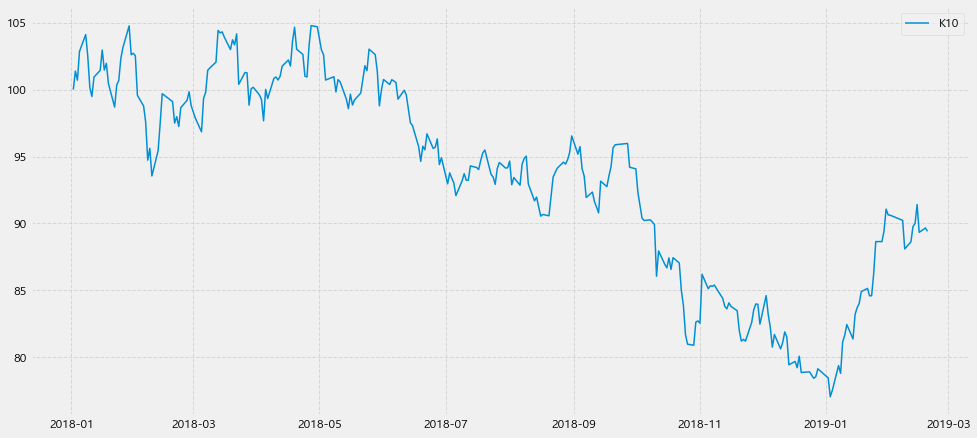

In [16]:
v.price_view(index, base_date, ['K10'])
# price_view(데이터프레임, 기준일자, [종목코드], (사이즈)) - 챠트 그리기

KOSPI200과 비교

In [17]:
K200 = ld.make_historical_price_df(path, 'KOSPI 200')

In [18]:
K200.head()

,KOSPI 200
Date,
2017-01-02,260.36
2017-01-03,262.97
2017-01-04,263.12
2017-01-05,261.98
2017-01-06,263.20


In [19]:
index['K200'] = K200.loc[base_date:]
# 1월2일 이후 지수만 idx의 K200 컬럼에 담음
index.head()

,K10,K200
Date,,
2018-01-02,100.00,326.00
2018-01-03,101.39,327.13
2018-01-04,100.71,324.58
2018-01-05,102.86,328.97
2018-01-08,104.12,331.28


In [20]:
index = index.fillna(method='ffill')
# NaN 값을 앞의 값으로 채움

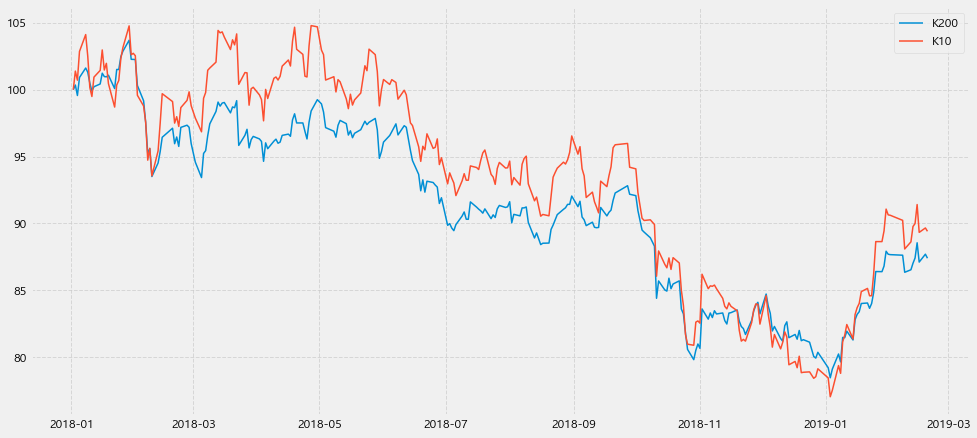

In [21]:
v.index_view(index, base_date, ['K200', 'K10'])
# index_view(데이터프레임, 기준일자, [종목코드], (사이즈)) - 비교를 위해 인덱스화한 그래프 그리기